In [1]:
import pandas as pd
import numpy as np
temp=pd.read_csv('../Data/global_temperatures.csv')
temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [2]:
co2=pd.read_csv("../Data/co_emissions.csv")
co2.head()

,Entity,Year,Annual CO₂ emissions (per capita)
0,Afghanistan,1949,0.001992
1,Afghanistan,1950,0.010837
2,Afghanistan,1951,0.011625
3,Afghanistan,1952,0.011468
4,Afghanistan,1953,0.013123


In [3]:
rain=pd.read_csv('../Data/precipitation.csv')
rain.head()

,Entity,Code,Year,Annual precipitation
0,Afghanistan,AFG,1940,217.67816
1,Afghanistan,AFG,1941,196.80933
2,Afghanistan,AFG,1942,300.08905
3,Afghanistan,AFG,1943,345.60892
4,Afghanistan,AFG,1944,324.44350


In [4]:
forest=pd.read_csv('../Data/Forest_area.csv')
forest.head()

,Entity,Code,Year,Annual net change in forest area
0,Algeria,DZA,1990,-8800.0
1,Algeria,DZA,2000,33900.0
2,Algeria,DZA,2010,7600.0
3,Algeria,DZA,2015,-1400.0
4,Argentina,ARG,1990,-182600.0


In [5]:
disasters=pd.read_csv('../Data/new_df5.csv')
disasters.head()

,Year,Country,ISO,Disaster Group,Disaster Subroup,Disaster Type,Disaster Subtype,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)","Total Damage (USD, adjusted)",CPI
0,1949.0,United States of America (the),NaN,Natural,Geophysical,Earthquake,Ground movement,1.0,2847.0,8.0,25000000.0,306809399.0,8.148381
1,1950.0,Antigua and Barbuda,ATG,Natural,Meteorological,Storm,Tropical cyclone,1.0,5478.5,2.0,1000000.0,12136582.0,8.239552
2,1950.0,Canada,CAN,Natural,Meteorological,Storm,Convective storm,1.0,2006.0,5.5,120000000.0,250280890.0,8.239552
3,1950.0,Ecuador,ECU,Natural,Hydrological,Flood,Flood,1.0,15959.5,50.0,13000000.0,37152696.0,8.239552
4,1950.0,Indonesia,IDN,Natural,Geophysical,Earthquake,Ground movement,1.0,50.0,16.0,20150000.0,39341639.0,8.239552


In [6]:
disasters.isnull().sum()

Year                              0
Country                           0
ISO                             771
Disaster Group                    0
Disaster Subroup                  0
Disaster Type                     0
Disaster Subtype                  0
Total Events                      0
Total Affected                    0
Total Deaths                      0
Total Damage (USD, original)      0
Total Damage (USD, adjusted)      0
CPI                               0
dtype: int64

In [7]:
print(co2.columns.tolist())

['Entity', 'Year', 'Annual CO₂ emissions (per capita)']


In [8]:
co2 = co2[["Entity", "Year", "Annual CO₂ emissions (per capita)"]].rename(columns={"Entity": "Country"})

In [9]:
co2.head()

,Country,Year,Annual CO₂ emissions (per capita)
0,Afghanistan,1949,0.001992
1,Afghanistan,1950,0.010837
2,Afghanistan,1951,0.011625
3,Afghanistan,1952,0.011468
4,Afghanistan,1953,0.013123


In [10]:
rain = rain[["Entity", "Code", "Year", "Annual precipitation"]].rename(columns={"Entity": "Country"})

In [11]:
rain.head()

,Country,Code,Year,Annual precipitation
0,Afghanistan,AFG,1940,217.67816
1,Afghanistan,AFG,1941,196.80933
2,Afghanistan,AFG,1942,300.08905
3,Afghanistan,AFG,1943,345.60892
4,Afghanistan,AFG,1944,324.44350


In [12]:
temp["Year"] = pd.to_datetime(temp["dt"]).dt.year

# Add a new column with the country-year average temp for each row
temp["AvgTemp_Year"] = (
    temp.groupby(["Country", "Year"])["AverageTemperature"]
    .transform("mean")
)

In [13]:
temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,AvgTemp_Year
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,25.582583
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,25.582583
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,25.582583
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,25.582583
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,25.582583


In [14]:
merged_df = co2.merge(rain, on=["Country", "Year"], how="outer")

In [15]:
merged_df.head()

,Country,Year,Annual CO₂ emissions (per capita),Code,Annual precipitation
0,Afghanistan,1949,0.001992,AFG,405.3034
1,Afghanistan,1950,0.010837,AFG,347.0461
2,Afghanistan,1951,0.011625,AFG,457.9805
3,Afghanistan,1952,0.011468,AFG,382.8329
4,Afghanistan,1953,0.013123,AFG,569.5969


In [16]:
merged_df = merged_df.merge(temp, on=["Country", "Year"], how="outer")

In [17]:
merged_df.head()

,Country,Year,Annual CO₂ emissions (per capita),Code,Annual precipitation,dt,AverageTemperature,AverageTemperatureUncertainty,City,Latitude,Longitude,AvgTemp_Year
0,Afghanistan,1949,0.001992,AFG,405.3034,1949-01-01,1.204,0.682,Kabul,34.56N,70.05E,14.17075
1,Afghanistan,1949,0.001992,AFG,405.3034,1949-02-01,3.183,0.669,Kabul,34.56N,70.05E,14.17075
2,Afghanistan,1949,0.001992,AFG,405.3034,1949-03-01,8.239,0.268,Kabul,34.56N,70.05E,14.17075
3,Afghanistan,1949,0.001992,AFG,405.3034,1949-04-01,16.010,0.731,Kabul,34.56N,70.05E,14.17075
4,Afghanistan,1949,0.001992,AFG,405.3034,1949-05-01,22.114,0.461,Kabul,34.56N,70.05E,14.17075


In [18]:
merged_df = merged_df.merge(disasters, on=["Country", "Year"], how="outer")
merged_df.head()

,Country,Year,Annual CO₂ emissions (per capita),Code,Annual precipitation,dt,AverageTemperature,AverageTemperatureUncertainty,City,Latitude,...,Disaster Group,Disaster Subroup,Disaster Type,Disaster Subtype,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)","Total Damage (USD, adjusted)",CPI
0,Afghanistan,1949.0,0.001992,AFG,405.3034,1949-01-01,1.204,0.682,Kabul,34.56N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1949.0,0.001992,AFG,405.3034,1949-02-01,3.183,0.669,Kabul,34.56N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1949.0,0.001992,AFG,405.3034,1949-03-01,8.239,0.268,Kabul,34.56N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1949.0,0.001992,AFG,405.3034,1949-04-01,16.010,0.731,Kabul,34.56N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1949.0,0.001992,AFG,405.3034,1949-05-01,22.114,0.461,Kabul,34.56N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
merged_df.columns

Index(['Country', 'Year', 'Annual CO₂ emissions (per capita)', 'Code',
       'Annual precipitation', 'dt', 'AverageTemperature',
       'AverageTemperatureUncertainty', 'City', 'Latitude', 'Longitude',
       'AvgTemp_Year', 'ISO', 'Disaster Group', 'Disaster Subroup',
       'Disaster Type', 'Disaster Subtype', 'Total Events', 'Total Affected',
       'Total Deaths', 'Total Damage (USD, original)',
       'Total Damage (USD, adjusted)', 'CPI'],
      dtype='object')

In [20]:
merged_df=merged_df.drop(["Code",'AverageTemperatureUncertainty','City','ISO','Disaster Group','Disaster Subroup','Disaster Subtype',
                          'Total Damage (USD, original)','dt','AverageTemperature'],axis=1)

In [21]:
merged_df.head()

,Country,Year,Annual CO₂ emissions (per capita),Annual precipitation,Latitude,Longitude,AvgTemp_Year,Disaster Type,Total Events,Total Affected,Total Deaths,"Total Damage (USD, adjusted)",CPI
0,Afghanistan,1949.0,0.001992,405.3034,34.56N,70.05E,14.17075,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1949.0,0.001992,405.3034,34.56N,70.05E,14.17075,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1949.0,0.001992,405.3034,34.56N,70.05E,14.17075,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1949.0,0.001992,405.3034,34.56N,70.05E,14.17075,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1949.0,0.001992,405.3034,34.56N,70.05E,14.17075,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
merged_df.isnull().sum()

Country                                   0
Year                                      0
Annual CO₂ emissions (per capita)     94444
Annual precipitation                 165507
Latitude                              24347
Longitude                             24347
AvgTemp_Year                          31067
Disaster Type                        244505
Total Events                         244505
Total Affected                       244505
Total Deaths                         244505
Total Damage (USD, adjusted)         244505
CPI                                  244505
dtype: int64

In [23]:
merged_df=merged_df.dropna(subset=["Disaster Type"])

In [24]:
merged_df.isnull().sum()

Country                                 0
Year                                    0
Annual CO₂ emissions (per capita)    1018
Annual precipitation                 1102
Latitude                             3731
Longitude                            3731
AvgTemp_Year                         3731
Disaster Type                           0
Total Events                            0
Total Affected                          0
Total Deaths                            0
Total Damage (USD, adjusted)            0
CPI                                     0
dtype: int64

In [25]:
merged_df["Annual CO₂ emissions (per capita)"] = (
    merged_df.groupby("Year")["Annual CO₂ emissions (per capita)"]
    .transform(lambda x: x.fillna(x.mean()))
)

In [26]:
merged_df["Annual precipitation"] = (
    merged_df.groupby("Year")["Annual precipitation"]
    .transform(lambda x: x.fillna(x.mean()))
)


In [27]:
merged_df["AvgTemp_Year"] = (
    merged_df.groupby("Year")["AvgTemp_Year"]
    .transform(lambda x: x.fillna(x.mean()))
)


In [28]:
merged_df.isnull().sum()

Country                                 0
Year                                    0
Annual CO₂ emissions (per capita)       1
Annual precipitation                    1
Latitude                             3731
Longitude                            3731
AvgTemp_Year                         1037
Disaster Type                           0
Total Events                            0
Total Affected                          0
Total Deaths                            0
Total Damage (USD, adjusted)            0
CPI                                     0
dtype: int64

In [29]:
merged_df[merged_df["AvgTemp_Year"].isnull()]


,Country,Year,Annual CO₂ emissions (per capita),Annual precipitation,Latitude,Longitude,AvgTemp_Year,Disaster Type,Total Events,Total Affected,Total Deaths,"Total Damage (USD, adjusted)",CPI
894,Afghanistan,2014.0,0.277076,348.421200,NaN,NaN,NaN,Storm,1.0,7500.0,63.0,8342696.0,80.892624
895,Afghanistan,2015.0,0.285831,396.690460,NaN,NaN,NaN,Flood,1.0,3010.0,7.0,8342696.0,80.988579
896,Afghanistan,2015.0,0.285831,396.690460,NaN,NaN,NaN,Landslide,1.0,500.0,52.0,8342696.0,80.988579
898,Afghanistan,2017.0,0.271161,324.953640,NaN,NaN,NaN,Flood,1.0,1822.0,36.0,8342696.0,83.757255
899,Afghanistan,2018.0,0.288541,280.105260,NaN,NaN,NaN,Flood,1.0,7500.0,11.0,8342696.0,85.803026
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271160,Venezuela (Bolivarian Republic of),2022.0,2.978532,1364.431459,NaN,NaN,NaN,Storm,1.0,30000.0,20.0,36197660.0,100.000000
271161,Congo (the Democratic Republic of the),2023.0,2.131939,1736.340262,NaN,NaN,NaN,Landslide,1.0,8000.0,19.0,12078910.5,73.307177
271162,Réunion,2023.0,2.131939,1736.340262,NaN,NaN,NaN,Storm,1.0,800.0,10.0,105077566.0,45.860338
271163,Syrian Arab Republic,2023.0,2.131939,1736.340262,NaN,NaN,NaN,Flood,1.0,2851.0,5.5,137669077.5,71.226252


In [30]:
merged_df=merged_df.dropna(subset=["Latitude"])

In [31]:
merged_df=merged_df.dropna(subset=["Longitude"])

In [32]:
merged_df.to_csv("../Data/merged_df.csv", index=False)

In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

merged_df = pd.read_csv("../Data/merged_df.csv")

# Convert Latitude and Longitude from string to float
def convert_lat_lon(value):
    try:
        if isinstance(value, str):
            if value.endswith("N") or value.endswith("E"):
                return float(value[:-1])
            elif value.endswith("S") or value.endswith("W"):
                return -float(value[:-1])
        return float(value)
    except:
        return None

In [34]:
merged_df["Latitude"] = merged_df["Latitude"].apply(convert_lat_lon)
merged_df["Longitude"] = merged_df["Longitude"].apply(convert_lat_lon)
merged_df.dropna(subset=["Latitude", "Longitude"], inplace=True)

In [35]:
merged_df.head()

,Country,Year,Annual CO₂ emissions (per capita),Annual precipitation,Latitude,Longitude,AvgTemp_Year,Disaster Type,Total Events,Total Affected,Total Deaths,"Total Damage (USD, adjusted)",CPI
0,Afghanistan,1956.0,0.021669,397.5075,34.56,70.05,14.579417,Flood,1.0,7500.0,51.0,8342696.0,9.288532
1,Afghanistan,1956.0,0.021669,397.5075,34.56,70.05,14.579417,Flood,1.0,7500.0,51.0,8342696.0,9.288532
2,Afghanistan,1956.0,0.021669,397.5075,34.56,70.05,14.579417,Flood,1.0,7500.0,51.0,8342696.0,9.288532
3,Afghanistan,1956.0,0.021669,397.5075,34.56,70.05,14.579417,Flood,1.0,7500.0,51.0,8342696.0,9.288532
4,Afghanistan,1956.0,0.021669,397.5075,34.56,70.05,14.579417,Flood,1.0,7500.0,51.0,8342696.0,9.288532


In [36]:
le = LabelEncoder()
merged_df["Country_encoded"] = le.fit_transform(merged_df["Country"])

In [37]:
features = ["Country_encoded", "Year"]
targets = ["AvgTemp_Year", "Annual CO₂ emissions (per capita)", "Annual precipitation"]

X = merged_df[features]
y = merged_df[targets]

# --------------------------
# Step 4: Train-test split
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --------------------------
# Step 5: Train model
# --------------------------
model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
model.fit(X_train, y_train)

# --------------------------
# Step 6: Predict and evaluate
# --------------------------
y_pred = model.predict(X_test)

def evaluate_model(y_true, y_pred, target_names):
    for i, target in enumerate(target_names):
        print(f"\n📊 Evaluation for {target}")
        print(f"MAE  : {mean_absolute_error(y_true[:, i], y_pred[:, i]):.4f}")
        print(f"RMSE : {np.sqrt(mean_squared_error(y_true[:, i], y_pred[:, i])):.4f}")
        print(f"R²   : {r2_score(y_true[:, i], y_pred[:, i]):.4f}")

evaluate_model(y_test.values, y_pred, targets)


📊 Evaluation for AvgTemp_Year
MAE  : 0.0000
RMSE : 0.0002
R²   : 1.0000

📊 Evaluation for Annual CO₂ emissions (per capita)
MAE  : 0.0000
RMSE : 0.0001
R²   : 1.0000

📊 Evaluation for Annual precipitation
MAE  : 0.0049
RMSE : 0.0845
R²   : 1.0000


In [38]:
def forecast(country_name, year):
    encoded_country = le.transform([country_name])[0]
    input_data = pd.DataFrame([[encoded_country, year]], columns=["Country_encoded", "Year"])
    prediction = model.predict(input_data)[0]
    return {
        "AvgTemp_Year": prediction[0],
        "Annual CO₂ emissions (per capita)": prediction[1],
        "Annual precipitation": prediction[2]
    }

# Example usage
print("\n🔮 Forecast for India in 2025:")
print(forecast("Afghanistan", 2025))


🔮 Forecast for India in 2025:
{'AvgTemp_Year': 16.206124999999982, 'Annual CO₂ emissions (per capita)': 0.2918319700000003, 'Annual precipitation': 332.73665999999946}


In [39]:
df = merged_df[["Country_encoded", "Year", "AvgTemp_Year", 
         "Annual CO₂ emissions (per capita)", "Annual precipitation"]]
df = df.sort_values(["Country_encoded", "Year"]).reset_index(drop=True)

In [40]:
# Normalize the features
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
# STEP 2: Create LSTM sequences
SEQUENCE_LENGTH = 10
X_seq, y_seq = [], []

for i in range(len(scaled_df) - SEQUENCE_LENGTH):
    if scaled_df.iloc[i:i+SEQUENCE_LENGTH]["Country_encoded"].nunique() == 1:
        X_seq.append(scaled_df.iloc[i:i+SEQUENCE_LENGTH][["Country_encoded", "Year"]].values)
        y_seq.append(scaled_df.iloc[i+SEQUENCE_LENGTH][[
            "AvgTemp_Year", 
            "Annual CO₂ emissions (per capita)", 
            "Annual precipitation"
        ]].values)

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# STEP 3: Define LSTM model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_seq.shape[1], X_seq.shape[2])),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(3)  # Output layer for 3 targets
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/50
284/284 [==============================] - 3s 6ms/step - loss: 0.0774 - mae: 0.2212 - val_loss: 0.0629 - val_mae: 0.2075
Epoch 2/50
284/284 [==============================] - 2s 6ms/step - loss: 0.0622 - mae: 0.2029 - val_loss: 0.0575 - val_mae: 0.2003
Epoch 3/50
284/284 [==============================] - 2s 6ms/step - loss: 0.0548 - mae: 0.1843 - val_loss: 0.0432 - val_mae: 0.1599
Epoch 4/50
284/284 [==============================] - 2s 8ms/step - loss: 0.0401 - mae: 0.1478 - val_loss: 0.0324 - val_mae: 0.1378
Epoch 5/50
284/284 [==============================] - 2s 6ms/step - loss: 0.0284 - mae: 0.1198 - val_loss: 0.0205 - val_mae: 0.0937
Epoch 6/50
284/284 [==============================] - 2s 6ms/step - loss: 0.0232 - mae: 0.1039 - val_loss: 0.0179 - val_mae: 0.0880
Epoch 7/50
284/284 [==============================] - 2s 6ms/step - loss: 0.0202 - mae: 0.0958 - val_loss: 0.0181 - val_mae: 0.0909
Epoch 8/50
284/284 [==============================] - 2s 6ms/step - loss: 0.

In [43]:
loss, mae = model.evaluate(X_test, y_test)
print("Test MSE Loss:", loss)
print("Test MAE:", mae)

142/142 [==============================] - 0s 2ms/step - loss: 0.0028 - mae: 0.0384
Test MSE Loss: 0.0027623989153653383
Test MAE: 0.038435567170381546


In [44]:
last_seq = X_seq[-1].reshape(1, 10, 2)
prediction = model.predict(last_seq)[0]
inv_scaled = scaler.inverse_transform([[0, 0] + list(prediction)])
print("Predicted values (Temperature, CO₂, Rainfall):", inv_scaled[0][2:])

1/1 [==============================] - 0s 170ms/step
Predicted values (Temperature, CO₂, Rainfall): [ 18.91686852   1.0211221  791.40297939]


In [45]:
y_pred = model.predict(X_test)
labels = ["Temperature", "CO₂ Emissions", "Precipitation"]

# Evaluate with RMSE and R²
for i in range(3):
    rmse = np.sqrt(mean_squared_error(y_test[:, i], y_pred[:, i]))
    r2 = r2_score(y_test[:, i], y_pred[:, i])
    print(f"\n🔍 {labels[i]} Evaluation:")
    print(f"  RMSE     : {rmse:.4f}")
    print(f"  R² Score : {r2:.4f}")

142/142 [==============================] - 0s 2ms/step

🔍 Temperature Evaluation:
  RMSE     : 0.0595
  R² Score : 0.9525

🔍 CO₂ Emissions Evaluation:
  RMSE     : 0.0508
  R² Score : 0.9626

🔍 Precipitation Evaluation:
  RMSE     : 0.0465
  R² Score : 0.9663


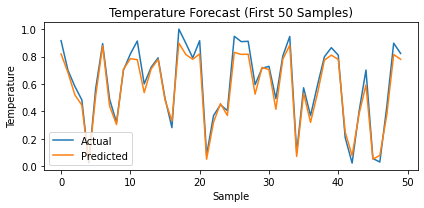

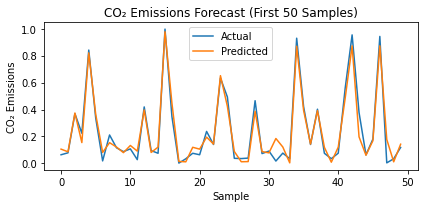

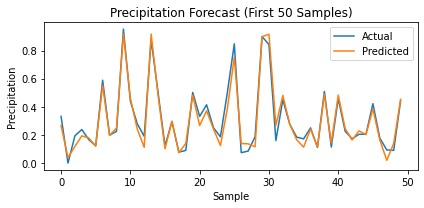

In [47]:
import matplotlib.pyplot as plt
for i in range(3):
    plt.figure(figsize=(6, 3))
    plt.plot(y_test[:50, i], label="Actual")
    plt.plot(y_pred[:50, i], label="Predicted")
    plt.title(f"{labels[i]} Forecast (First 50 Samples)")
    plt.xlabel("Sample")
    plt.ylabel(labels[i])
    plt.legend()
    plt.tight_layout()
    plt.show()

In [48]:
def forecast_lstm(country_name, next_year, raw_df, scaler, model, le):
    # Step 1: Get last 5 years of data for the country
    country_id = le.transform([country_name])[0]
    country_data = raw_df[raw_df["Country"] == country_name].sort_values("Year")

    # Check if we have at least 5 years of data
    if len(country_data) < 5:
        raise ValueError(f"Not enough data for {country_name} to make LSTM prediction.")

    last_5 = country_data[["Country_encoded", "Year"]].tail(5).copy()

    # Step 2: Normalize this input using same scaler
    input_for_scaling = country_data[["Country_encoded", "Year", "AvgTemp_Year",
                                      "Annual CO₂ emissions (per capita)", "Annual precipitation"]].tail(5)
    scaled = scaler.transform(input_for_scaling)
    scaled_last_5 = scaled[:, :2]  # Only Country_encoded and Year as LSTM input features

    # Step 3: Reshape for LSTM input
    input_seq = scaled_last_5.reshape(1, 5, 2)

    # Step 4: Predict using the LSTM model
    pred_scaled = model.predict(input_seq)[0]

    # Step 5: Inverse transform the output
    inverse_input = np.zeros((1, 5))  # 5 columns like in scaled_df
    inverse_input[0, 2:] = pred_scaled  # Put predicted values in correct position
    prediction = scaler.inverse_transform(inverse_input)[0][2:]  # Extract the target columns only

    return {
        "AvgTemp_Year": prediction[0],
        "Annual CO₂ emissions (per capita)": prediction[1],
        "Annual precipitation": prediction[2]
    }



In [49]:
df_original = pd.read_csv("../Data/merged_df.csv")

# Reapply Country encoding so it matches the model
df_original["Country_encoded"] = le.transform(df_original["Country"])

# Then use:
forecast_lstm("India", 2025, raw_df=df_original, scaler=scaler, model=model, le=le)


1/1 [==============================] - 0s 120ms/step


{'AvgTemp_Year': 20.319817399223645,
 'Annual CO₂ emissions (per capita)': 1.5964036755875683,
 'Annual precipitation': 1019.8860969568988}

In [50]:
import pandas as pd
import numpy as np
from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer, Baseline
from pytorch_forecasting.data import NaNLabelEncoder
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor
import torch

ModuleNotFoundError: No module named 'pytorch_forecasting'